# Prepare Requirement

In [ ]:
!pip install kaggle

In [ ]:
cred = {"username":"nisrinasalm","key":"b740180f8fa2f5861bac033488a60e66"}
! mkdir -p ~/.kaggle
! touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open("/root/.kaggle/kaggle.json", "w") as file:
  json.dump(api_token, file)

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d dhoogla/unswnb15
!kaggle datasets download -d mrwellsdavid/unsw-nb15

Dataset URL: https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
License(s): unknown
 62% 92.0M/149M [00:00<00:00, 955MB/s]
100% 149M/149M [00:00<00:00, 544MB/s] 


In [ ]:
# !unzip unswnb15.zip
!unzip unsw-nb15.zip

Archive:  unsw-nb15.zip
  inflating: NUSW-NB15_features.csv  
  inflating: UNSW-NB15_1.csv         
  inflating: UNSW-NB15_2.csv         
  inflating: UNSW-NB15_3.csv         
  inflating: UNSW-NB15_4.csv         
  inflating: UNSW-NB15_LIST_EVENTS.csv  
  inflating: UNSW_NB15_testing-set.csv  
  inflating: UNSW_NB15_training-set.csv  


In [ ]:
import pandas as pd
import numpy as np
from argparse import Namespace

In [ ]:
# df_train = pd.read_parquet('UNSW_NB15_training-set.parquet')
# df_test = pd.read_parquet('UNSW_NB15_testing-set.parquet')
df_train = pd.read_csv('UNSW_NB15_training-set.csv')
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
df_train.shape

(82332, 45)

In [ ]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
ATTACK_CAT_TO_ID = {
    'Normal': 0,
    'Reconnaissance': 1,
    'Backdoor': 2,
    'DoS': 3,
    'Exploits': 4,
    'Analysis': 5,
    'Fuzzers': 6,
    'Worms': 7,
    'Shellcode': 8,
    'Generic': 9,
}

In [ ]:
def proto_to_one_hot(x):
    proto_val = [
        'udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip', 'ipnip', 'st2', 'argus', 'chaos', 'egp',
        'emcon', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2', 'xns-idp', 'leaf-1', 'leaf-2',
        'irtp', 'rdp', 'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6', 'sdrp',
        'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd', 'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any',
        'ipv6-opts', 'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn', 'pvp', 'br-sat-mon', 'sun-nd',
        'wb-mon', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25',
        'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp',
        'bna', 'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep', 'secure-vmtp', 'xtp', 'il', 'rsvp',
        'unas', 'fc', 'iso-ip', 'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer', 'ipx-n-ip', 'pgm',
        'vrrp', 'l2tp', 'zero', 'ddx', 'iatp', 'stp', 'srp', 'uti', 'sm', 'smp', 'isis', 'ptp', 'fire', 'crtp', 'crudp',
        'sccopmce', 'iplt', 'pipe', 'sps', 'ib', 'icmp', 'rtp'
    ]

    one_hot = [0] * len(proto_val)
    one_hot[proto_val.index(x)] = 1

    return one_hot

In [ ]:
def service_to_one_hot(x):
    service_val = [
        '-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp', 'ssl', 'dhcp', 'irc', 'radius', 'ssh'
    ]

    one_hot = [0] * len(service_val)
    one_hot[service_val.index(x)] = 1

    return one_hot

In [ ]:
def state_to_one_hot(x):
    state_val = ['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO', 'ECO', 'PAR', 'URN', 'no']

    one_hot = [0] * len(state_val)
    one_hot[state_val.index(x)] = 1

    return one_hot

In [ ]:
def double_sided_log(x):
    return np.sign(x) * np.log(1 + np.abs(x))

In [ ]:
def sigmoid(x):
    return np.divide(1, (1 + np.exp(np.negative(x))))

In [ ]:
def preprocess_data(data):
    # extract label and drop id
    attack_cat = data['attack_cat'].apply(func=(lambda x: ATTACK_CAT_TO_ID.get(x))).to_numpy().reshape(-1, 1)
    label = data['label'].to_numpy().reshape(-1, 1)
    data = data.drop(['id', 'attack_cat', 'label'], axis=1)

    # categorical to one-hot-encoding
    # extract and transform categorical to one-hot
    proto = np.array(data['proto'].apply(lambda x: proto_to_one_hot(x)).to_list())
    service = np.array(data['service'].apply(lambda x: service_to_one_hot(x)).to_list())
    state = np.array(data['state'].apply(lambda x: state_to_one_hot(x)).to_list())
    categorical = np.concatenate([proto, service, state], axis=1)
    data = data.drop(['proto', 'service', 'state'], axis=1)

    # transform to np matrix
    data = data.to_numpy()

    # merge categorical feature back to data
    data = np.concatenate([data, categorical], axis=1)

    # double-sided log: to attenuate outliers
    data = double_sided_log(data)

    # sigmoid transform
    data = sigmoid(data)

    # merge label back to data
    data = np.concatenate([data, attack_cat, label], axis=1)

    return data

In [ ]:
train_data = preprocess_data(df_train)
test_data = preprocess_data(df_test)

# CNN

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# === Binary Classification ===

# Fitur: semua kolom kecuali 2 terakhir (attack_cat, label)
X_train_bin = train_data[:, :-2]
X_test_bin = test_data[:, :-2]

# Label biner: kolom terakhir
y_train_bin = train_data[:, -1]
y_test_bin = test_data[:, -1]

# Reshape untuk CNN 1D
X_train_bin = X_train_bin[..., np.newaxis]  # (samples, timesteps, 1)
X_test_bin = X_test_bin[..., np.newaxis]

# === Multiclass Classification ===

# Fitur sama dengan binary
X_train_multi = train_data[:, :-2]
X_test_multi = test_data[:, :-2]

# Label multiclass: kolom ke-1 dari belakang (attack_cat)
y_train_multi = train_data[:, -2]
y_test_multi = test_data[:, -2]

# Reshape untuk CNN 1D
X_train_multi = X_train_multi[..., np.newaxis]
X_test_multi = X_test_multi[..., np.newaxis]

# One-hot encoding untuk multiclass
y_train_multi = to_categorical(y_train_multi)
y_test_multi = to_categorical(y_test_multi)

# --- Siap digunakan untuk training ---
print("Binary Input Shape:", X_train_bin.shape)
print("Binary Label Shape:", y_train_bin.shape)
print("Multiclass Input Shape:", X_train_multi.shape)
print("Multiclass Label Shape (one-hot):", y_train_multi.shape)


Binary Input Shape: (82332, 196, 1)
Binary Label Shape: (82332,)
Multiclass Input Shape: (82332, 196, 1)
Multiclass Label Shape (one-hot): (82332, 10)


## Binary

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, AveragePooling1D, Dense, Flatten, Dropout, Input, Activation

def cnn_model(input_dim,
                           c1_out, c1_kernel,
                           c2_out, c2_kernel,
                           c3_out, c3_kernel,
                           final_conv, final_kernel,
                           out_classes):
    model = Sequential()

    # Input Layer
    model.add(Input(shape=(input_dim, 1)))

    # Block 1
    model.add(Conv1D(filters=c1_out, kernel_size=c1_kernel, activation='relu'))

    # Block 2
    model.add(Conv1D(filters=c2_out, kernel_size=c2_kernel, activation='relu'))

    # Block 3
    model.add(Conv1D(filters=c3_out, kernel_size=c3_kernel, activation='relu'))

    # Final Conv
    model.add(Conv1D(filters=final_conv, kernel_size=final_kernel, activation='relu'))

    # Average Pooling
    model.add(AveragePooling1D(pool_size=final_conv))

    # Dropout
    model.add(Dropout(0.5))

    # Flatten
    model.add(Flatten())

    # Output Layer
    if out_classes == 2:
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(out_classes, activation='softmax'))

    model.summary()
    return model


### Batch Train 16

In [ ]:
model_bin = cnn_model(
    input_dim=X_train_bin.shape[1],
    c1_out=64, c1_kernel=6,
    c2_out=128, c2_kernel=6,
    c3_out=256, c3_kernel=6,
    final_conv=64, final_kernel=3,
    out_classes=2  # binary
)

model_bin.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

print("Training Binary Classification Model...")
model_bin.fit(
    X_train_bin, y_train_bin,
    validation_data=(X_test_bin, y_test_bin),
    epochs=10,
    batch_size=16
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 191, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 186, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 181, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 179, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 2, 64)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295,937 (1.13 MB)

 Trainable params: 295,937 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Training Binary Classification Model...
Epoch 1/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 73s 13ms/step - accuracy: 0.7534 - loss: 0.4558 - val_accuracy: 0.8906 - val_loss: 0.3165
Epoch 2/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 74s 12ms/step - accuracy: 0.9312 - loss: 0.1936 - val_accuracy: 0.8961 - val_loss: 0.2986
Epoch 3/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 70s 10ms/step - accuracy: 0.9385 - loss: 0.1656 - val_accuracy: 0.9015 - val_loss: 0.2861
Epoch 4/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 88s 11ms/step - accuracy: 0.9441 - loss: 0.1492 - val_accuracy: 0.8976 - val_loss: 0.2894
Epoch 5/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9448 - loss: 0.1432 - val_accuracy: 0.8979 - val_loss: 0.2518
Epoch 6/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 70s 10ms/step - accuracy: 0.9477 - loss: 0.1344 - val_accuracy: 0.8988 - val_loss: 0.3067
Epoch 7/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.9493 - loss: 0.1330 - val_accuracy: 0.9008 - val_loss: 0.2504
Epoch 8/10
5146/5146 ━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix

# --- Evaluasi model ---
loss_bin, acc_bin = model_bin.evaluate(X_test_bin, y_test_bin, verbose=0)

# Prediksi probabilitas
y_pred_prob_bin = model_bin.predict(X_test_bin)
y_pred_bin = (y_pred_prob_bin > 0.5).astype(int)

# Confusion Matrix
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm_bin.ravel()

# Metrics
detection_rate_bin = recall_score(y_test_bin, y_pred_bin)
false_positive_rate_bin = fp / (fp + tn)

# --- Output ---
print("🔹 Binary Classification Evaluation")
print(f"Validation Accuracy     : {acc_bin:.4f}")
print(f"Detection Rate (Recall) : {detection_rate_bin:.4f}")
print(f"False Positive Rate     : {false_positive_rate_bin:.4f}")
print("Confusion Matrix:\n", cm_bin)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
🔹 Binary Classification Evaluation
Validation Accuracy     : 0.8988
Detection Rate (Recall) : 0.8678
False Positive Rate     : 0.0352
Confusion Matrix:
 [[ 54028   1972]
 [ 15779 103562]]


### Batch Train 8

In [ ]:
model_bin = cnn_model(
    input_dim=X_train_bin.shape[1],
    c1_out=64, c1_kernel=6,
    c2_out=128, c2_kernel=6,
    c3_out=256, c3_kernel=6,
    final_conv=64, final_kernel=3,
    out_classes=2  # binary
)

model_bin.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

print("Training Binary Classification Model...")
model_bin.fit(
    X_train_bin, y_train_bin,
    validation_data=(X_test_bin, y_test_bin),
    epochs=10,
    batch_size=8
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 191, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 186, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 181, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 179, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 2, 64)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295,937 (1.13 MB)

 Trainable params: 295,937 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Training Binary Classification Model...
Epoch 1/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 118s 11ms/step - accuracy: 0.8053 - loss: 0.3853 - val_accuracy: 0.9033 - val_loss: 0.2102
Epoch 2/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 146s 12ms/step - accuracy: 0.9338 - loss: 0.1797 - val_accuracy: 0.9038 - val_loss: 0.2035
Epoch 3/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 124s 10ms/step - accuracy: 0.9429 - loss: 0.1569 - val_accuracy: 0.9052 - val_loss: 0.2616
Epoch 4/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 159s 12ms/step - accuracy: 0.9453 - loss: 0.1452 - val_accuracy: 0.8940 - val_loss: 0.3031
Epoch 5/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 139s 11ms/step - accuracy: 0.9496 - loss: 0.1327 - val_accuracy: 0.8890 - val_loss: 0.3362
Epoch 6/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 116s 11ms/step - accuracy: 0.9504 - loss: 0.1300 - val_accuracy: 0.8948 - val_loss: 0.3210
Epoch 7/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 116s 11ms/step - accuracy: 0.9534 - loss: 0.1229 - val_accuracy: 0.8904 - val_loss: 0.3281
Epoch 8/10
1029

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix

# --- Evaluasi model ---
loss_bin, acc_bin = model_bin.evaluate(X_test_bin, y_test_bin, verbose=0)

# Prediksi probabilitas
y_pred_prob_bin = model_bin.predict(X_test_bin)
y_pred_bin = (y_pred_prob_bin > 0.5).astype(int)

# Confusion Matrix
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm_bin.ravel()

# Metrics
detection_rate_bin = recall_score(y_test_bin, y_pred_bin)
false_positive_rate_bin = fp / (fp + tn)

# --- Output ---
print("🔹 Binary Classification Evaluation")
print(f"Validation Accuracy     : {acc_bin:.4f}")
print(f"Detection Rate (Recall) : {detection_rate_bin:.4f}")
print(f"False Positive Rate     : {false_positive_rate_bin:.4f}")
print("Confusion Matrix:\n", cm_bin)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
🔹 Binary Classification Evaluation
Validation Accuracy     : 0.8949
Detection Rate (Recall) : 0.8597
False Positive Rate     : 0.0302
Confusion Matrix:
 [[ 54310   1690]
 [ 16739 102602]]


## Multiclass

### Batch Train 16

In [ ]:
model_multi = cnn_model(
    input_dim=X_train_multi.shape[1],
    c1_out=64, c1_kernel=6,
    c2_out=128, c2_kernel=6,
    c3_out=256, c3_kernel=6,
    final_conv=64, final_kernel=3,
    out_classes=10  # jumlah kelas attack_cat
)

model_multi.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

print("Training Multiclass Classification Model...")
model_multi.fit(
    X_train_multi, y_train_multi,
    validation_data=(X_test_multi, y_test_multi),
    epochs=10,
    batch_size=16
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 191, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 186, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 181, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 179, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 2, 64)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,098 (1.13 MB)

 Trainable params: 297,098 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Training Multiclass Classification Model...
Epoch 1/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 73s 13ms/step - accuracy: 0.5761 - loss: 1.2557 - val_accuracy: 0.7097 - val_loss: 0.8374
Epoch 2/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 73s 12ms/step - accuracy: 0.7663 - loss: 0.6708 - val_accuracy: 0.7287 - val_loss: 0.8501
Epoch 3/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.8039 - loss: 0.5689 - val_accuracy: 0.7057 - val_loss: 0.8803
Epoch 4/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.8152 - loss: 0.5358 - val_accuracy: 0.7257 - val_loss: 0.8742
Epoch 5/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.8173 - loss: 0.5214 - val_accuracy: 0.7046 - val_loss: 0.9943
Epoch 6/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 81s 10ms/step - accuracy: 0.8278 - loss: 0.4929 - val_accuracy: 0.7298 - val_loss: 0.8328
Epoch 7/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.8272 - loss: 0.4919 - val_accuracy: 0.7272 - val_loss: 0.8410
Epoch 8/10
5146/5146 ━━━━━━━━━━━

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import numpy as np

# Prediksi dan konversi one-hot ke label
y_pred_prob_multi = model_multi.predict(X_test_multi)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)
y_true_multi = np.argmax(y_test_multi, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_multi, y_pred_multi)

# Accuracy
acc = accuracy_score(y_true_multi, y_pred_multi)

# Macro Recall (Detection Rate)
detection_rate = recall_score(y_true_multi, y_pred_multi, average='macro')

# False Positive Rate (macro rata-rata)
false_positive_rates = []
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
    false_positive_rates.append(fpr)
fpr_macro = np.mean(false_positive_rates)

# Cetak hasil
print("🔸 Multiclass Classification Evaluation")
print(f"Validation Accuracy     : {acc:.4f}")
print(f"Detection Rate (Recall) : {detection_rate:.4f}")
print(f"False Positive Rate     : {fpr_macro:.4f}")
print("Confusion Matrix:\n", cm)



5480/5480 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
🔸 Multiclass Classification Evaluation
Validation Accuracy     : 0.7253
Detection Rate (Recall) : 0.3705
False Positive Rate     : 0.0349
Confusion Matrix:
 [[55012   246     0     0   350     0   164     0     0   228]
 [ 1616  5827     0  1257  1423     0   340     0     0    28]
 [   75    48     0  1053   562     0     8     0     0     0]
 [  438   432     0  7040  4283     0    40     0     0    31]
 [ 2294  1886     0  9102 19855     0   162     0     0    94]
 [  504     0     0  1125   371     0     0     0     0     0]
 [14864   664     0  1038   767     0   408     0     0   443]
 [   14    46     0     0    69     0     1     0     0     0]
 [  193   875     0     0     4     0    59     0     0     2]
 [  206   112     0   205   435     0    13     0     0 39029]]


### Batch Train 8

In [ ]:
model_multi = cnn_model(
    input_dim=X_train_multi.shape[1],
    c1_out=64, c1_kernel=6,
    c2_out=128, c2_kernel=6,
    c3_out=256, c3_kernel=6,
    final_conv=64, final_kernel=3,
    out_classes=10  # jumlah kelas attack_cat
)

model_multi.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

print("Training Multiclass Classification Model...")
model_multi.fit(
    X_train_multi, y_train_multi,
    validation_data=(X_test_multi, y_test_multi),
    epochs=10,
    batch_size=8
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 191, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 186, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 181, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 179, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 2, 64)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,098 (1.13 MB)

 Trainable params: 297,098 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Training Multiclass Classification Model...
Epoch 1/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 127s 12ms/step - accuracy: 0.5928 - loss: 1.1758 - val_accuracy: 0.7235 - val_loss: 0.8212
Epoch 2/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 102s 8ms/step - accuracy: 0.7942 - loss: 0.5896 - val_accuracy: 0.7276 - val_loss: 0.8546
Epoch 3/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 116s 11ms/step - accuracy: 0.8142 - loss: 0.5328 - val_accuracy: 0.7370 - val_loss: 0.8684
Epoch 4/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 86s 8ms/step - accuracy: 0.8207 - loss: 0.5141 - val_accuracy: 0.7300 - val_loss: 0.8791
Epoch 5/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 143s 8ms/step - accuracy: 0.8263 - loss: 0.4926 - val_accuracy: 0.7282 - val_loss: 0.9239
Epoch 6/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 171s 11ms/step - accuracy: 0.8281 - loss: 0.4829 - val_accuracy: 0.7348 - val_loss: 0.9236
Epoch 7/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 142s 11ms/step - accuracy: 0.8321 - loss: 0.4703 - val_accuracy: 0.7276 - val_loss: 0.8005
Epoch 8/10
1029

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import numpy as np

# Prediksi dan konversi one-hot ke label
y_pred_prob_multi = model_multi.predict(X_test_multi)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)
y_true_multi = np.argmax(y_test_multi, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_multi, y_pred_multi)

# Accuracy
acc = accuracy_score(y_true_multi, y_pred_multi)

# Macro Recall (Detection Rate)
detection_rate = recall_score(y_true_multi, y_pred_multi, average='macro')

# False Positive Rate (macro rata-rata)
false_positive_rates = []
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
    false_positive_rates.append(fpr)
fpr_macro = np.mean(false_positive_rates)

# Cetak hasil
print("🔸 Multiclass Classification Evaluation")
print(f"Validation Accuracy     : {acc:.4f}")
print(f"Detection Rate (Recall) : {detection_rate:.4f}")
print(f"False Positive Rate     : {fpr_macro:.4f}")
print("Confusion Matrix:\n", cm)



5480/5480 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
🔸 Multiclass Classification Evaluation
Validation Accuracy     : 0.7383
Detection Rate (Recall) : 0.3555
False Positive Rate     : 0.0341
Confusion Matrix:
 [[54664   323     0    15   689     0   113     0     0   196]
 [  978  6628     0   284  2478     0   111     0     0    12]
 [   53    43     0   309  1340     0     1     0     0     0]
 [  357   447     0  1758  9663     0    18     0     0    21]
 [ 1938  1788     0  2318 27183     0   108     0     0    58]
 [  495     0     0   290  1215     0     0     0     0     0]
 [14790   843     0   264  1622     0   308     0     0   357]
 [   11    45     0     0    74     0     0     0     0     0]
 [  125   867     0     0   127     0    14     0     0     0]
 [  295   124     0    68   582     0     9     0     0 38922]]


# RNN

## Binary

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, GlobalAveragePooling1D, Dropout, Dense

def rnn_model(input_shape, out_classes):
    model = Sequential()

    # LSTM Block 1
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))

    # LSTM Block 2
    model.add(LSTM(128, return_sequences=True))

    # LSTM Block 3
    model.add(LSTM(256, return_sequences=True))

    # Conv1D Layer
    model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))

    # Global Average Pooling
    model.add(GlobalAveragePooling1D())

    # Dropout
    model.add(Dropout(0.5))

    # Fully Connected
    if out_classes == 1:
        model.add(Dense(1, activation='sigmoid'))  # Binary
    else:
        model.add(Dense(out_classes, activation='softmax'))  # Multiclass

    return model


### Batch Train 16

In [ ]:
model_rnn_bin = rnn_model(input_shape=(196, 1), out_classes=1)
model_rnn_bin.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Training RNN Binary Classification Model...")
model_rnn_bin.fit(
    X_train_bin, y_train_bin,
    validation_data=(X_test_bin, y_test_bin),
    epochs=10,
    batch_size=16
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training RNN Binary Classification Model...
Epoch 1/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 297s 57ms/step - accuracy: 0.5614 - loss: 0.6854 - val_accuracy: 0.6806 - val_loss: 0.6593
Epoch 2/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 311s 55ms/step - accuracy: 0.5528 - loss: 0.6864 - val_accuracy: 0.6806 - val_loss: 0.6535
Epoch 3/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 322s 55ms/step - accuracy: 0.6281 - loss: 0.6214 - val_accuracy: 0.7407 - val_loss: 0.3800
Epoch 4/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 285s 55ms/step - accuracy: 0.7439 - loss: 0.4774 - val_accuracy: 0.7833 - val_loss: 0.4507
Epoch 5/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 285s 55ms/step - accuracy: 0.7683 - loss: 0.4667 - val_accuracy: 0.7595 - val_loss: 0.3967
Epoch 6/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 321s 55ms/step - accuracy: 0.7871 - loss: 0.4430 - val_accuracy: 0.8140 - val_loss: 0.3481
Epoch 7/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 296s 50ms/step - accuracy: 0.7865 - loss: 0.4396 - val_accuracy: 0.8075 - val_loss: 0.3507
Epoch 8/10
5146/5146 ━━━━

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score

# Prediksi probabilitas
y_pred_prob_bin = model_rnn_bin.predict(X_test_bin)

# Konversi ke kelas 0/1
y_pred_bin = (y_pred_prob_bin > 0.5).astype(int).flatten()
y_true_bin = y_test_bin.flatten()

# Confusion Matrix
cm_bin = confusion_matrix(y_true_bin, y_pred_bin)
tn, fp, fn, tp = cm_bin.ravel()

# Accuracy
acc_bin = accuracy_score(y_true_bin, y_pred_bin)

# Recall (Detection Rate)
detection_rate_bin = recall_score(y_true_bin, y_pred_bin)

# False Positive Rate
false_positive_rate_bin = fp / (fp + tn) if (fp + tn) > 0 else 0

# Cetak hasil
print("🔹 RNN Binary Classification Evaluation")
print(f"Validation Accuracy     : {acc_bin:.4f}")
print(f"Detection Rate (Recall) : {detection_rate_bin:.4f}")
print(f"False Positive Rate     : {false_positive_rate_bin:.4f}")
print("Confusion Matrix:\n", cm_bin)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step
🔹 RNN Binary Classification Evaluation
Validation Accuracy     : 0.8745
Detection Rate (Recall) : 0.8291
False Positive Rate     : 0.0287
Confusion Matrix:
 [[54392  1608]
 [20395 98946]]


### Batch Train 8

In [ ]:
model_rnn_bin = rnn_model(input_shape=(196, 1), out_classes=1)
model_rnn_bin.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Training RNN Binary Classification Model...")
model_rnn_bin.fit(
    X_train_bin, y_train_bin,
    validation_data=(X_test_bin, y_test_bin),
    epochs=10,
    batch_size=8
)

Training RNN Binary Classification Model...
Epoch 1/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 511s 49ms/step - accuracy: 0.5745 - loss: 0.6722 - val_accuracy: 0.7139 - val_loss: 0.5311
Epoch 2/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 559s 49ms/step - accuracy: 0.7297 - loss: 0.5408 - val_accuracy: 0.7977 - val_loss: 0.4108
Epoch 3/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 561s 49ms/step - accuracy: 0.7512 - loss: 0.4866 - val_accuracy: 0.7721 - val_loss: 0.3798
Epoch 4/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 561s 49ms/step - accuracy: 0.7685 - loss: 0.4606 - val_accuracy: 0.7973 - val_loss: 0.3714
Epoch 5/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 504s 49ms/step - accuracy: 0.7775 - loss: 0.4512 - val_accuracy: 0.7474 - val_loss: 0.4131
Epoch 6/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 504s 43ms/step - accuracy: 0.7904 - loss: 0.4392 - val_accuracy: 0.7981 - val_loss: 0.3613
Epoch 7/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 559s 49ms/step - accuracy: 0.7900 - loss: 0.4363 - val_accuracy: 0.8166 - val_loss: 0.3447
Epoch 8/10


In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score

# Prediksi probabilitas
y_pred_prob_bin = model_rnn_bin.predict(X_test_bin)

# Konversi ke kelas 0/1
y_pred_bin = (y_pred_prob_bin > 0.5).astype(int).flatten()
y_true_bin = y_test_bin.flatten()

# Confusion Matrix
cm_bin = confusion_matrix(y_true_bin, y_pred_bin)
tn, fp, fn, tp = cm_bin.ravel()

# Accuracy
acc_bin = accuracy_score(y_true_bin, y_pred_bin)

# Recall (Detection Rate)
detection_rate_bin = recall_score(y_true_bin, y_pred_bin)

# False Positive Rate
false_positive_rate_bin = fp / (fp + tn) if (fp + tn) > 0 else 0

# Cetak hasil
print("🔹 RNN Binary Classification Evaluation")
print(f"Validation Accuracy     : {acc_bin:.4f}")
print(f"Detection Rate (Recall) : {detection_rate_bin:.4f}")
print(f"False Positive Rate     : {false_positive_rate_bin:.4f}")
print("Confusion Matrix:\n", cm_bin)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step
🔹 RNN Binary Classification Evaluation
Validation Accuracy     : 0.8288
Detection Rate (Recall) : 0.8024
False Positive Rate     : 0.1150
Confusion Matrix:
 [[49558  6442]
 [23576 95765]]


## Multiclass

### Batch Train 16

In [ ]:
model_rnn_multi = rnn_model(input_shape=(196, 1), out_classes=10)  # 10 kelas attack_cat

model_rnn_multi.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Training RNN Multiclass Classification Model...")
model_rnn_multi.fit(
    X_train_multi, y_train_multi,
    validation_data=(X_test_multi, y_test_multi),
    epochs=10,
    batch_size=16
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training RNN Multiclass Classification Model...
Epoch 1/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 266s 51ms/step - accuracy: 0.4500 - loss: 1.5644 - val_accuracy: 0.3194 - val_loss: 1.7925
Epoch 2/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 342s 55ms/step - accuracy: 0.4487 - loss: 1.5467 - val_accuracy: 0.3194 - val_loss: 1.7745
Epoch 3/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 322s 55ms/step - accuracy: 0.5730 - loss: 1.3201 - val_accuracy: 0.5247 - val_loss: 1.4011
Epoch 4/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 324s 55ms/step - accuracy: 0.6054 - loss: 1.2125 - val_accuracy: 0.5342 - val_loss: 1.3606
Epoch 5/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 321s 55ms/step - accuracy: 0.6203 - loss: 1.1634 - val_accuracy: 0.5611 - val_loss: 1.3152
Epoch 6/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 322s 55ms/step - accuracy: 0.6315 - loss: 1.1380 - val_accuracy: 0.5641 - val_loss: 1.2895
Epoch 7/10
5146/5146 ━━━━━━━━━━━━━━━━━━━━ 263s 51ms/step - accuracy: 0.6466 - loss: 1.1003 - val_accuracy: 0.5492 - val_loss: 1.2887
Epoch 8/10
5146/5146 

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import numpy as np

# Prediksi dan konversi one-hot ke label
y_pred_prob_multi = model_rnn_multi.predict(X_test_multi)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)
y_true_multi = np.argmax(y_test_multi, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_multi, y_pred_multi)

# Accuracy
acc = accuracy_score(y_true_multi, y_pred_multi)

# Macro Recall (Detection Rate)
detection_rate = recall_score(y_true_multi, y_pred_multi, average='macro')

# False Positive Rate (macro average)
false_positive_rates = []
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
    false_positive_rates.append(fpr)
fpr_macro = np.mean(false_positive_rates)

# Cetak hasil
print("🔸 RNN Multiclass Classification Evaluation")
print(f"Validation Accuracy     : {acc:.4f}")
print(f"Detection Rate (Recall) : {detection_rate:.4f}")
print(f"False Positive Rate     : {fpr_macro:.4f}")
print("Confusion Matrix:\n", cm)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 62s 11ms/step
🔸 RNN Multiclass Classification Evaluation
Validation Accuracy     : 0.6772
Detection Rate (Recall) : 0.3373
False Positive Rate     : 0.0425
Confusion Matrix:
 [[53642    42     0    68  2066     0   173     0     0     9]
 [ 4714  3559     0  1408   707     0     2     0     0   101]
 [  224    44     0  1157   305     0     2     0     0    14]
 [ 1587   396     0  8028  2109     0    14     0     0   130]
 [ 8377   553     0 10323 13929     0    72     0     0   139]
 [  536    55     0  1270   112     0    19     0     0     8]
 [14778   160     0  1288  1453     0   469     0     0    36]
 [   97     0     0     0    33     0     0     0     0     0]
 [  515    58     0    51   359     0    43     0     0   107]
 [  342     9     0   218   308     0     2     0     0 39121]]


### Batch Train 8

In [ ]:
model_rnn_multi = rnn_model(input_shape=(196, 1), out_classes=10)  # 10 kelas attack_cat

model_rnn_multi.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Training RNN Multiclass Classification Model...")
model_rnn_multi.fit(
    X_train_multi, y_train_multi,
    validation_data=(X_test_multi, y_test_multi),
    epochs=10,
    batch_size=8
)

Training RNN Multiclass Classification Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 508s 49ms/step - accuracy: 0.4697 - loss: 1.5339 - val_accuracy: 0.5107 - val_loss: 1.4686
Epoch 2/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 449s 44ms/step - accuracy: 0.5973 - loss: 1.2697 - val_accuracy: 0.5102 - val_loss: 1.3903
Epoch 3/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 554s 49ms/step - accuracy: 0.6033 - loss: 1.2219 - val_accuracy: 0.5416 - val_loss: 1.3366
Epoch 4/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 452s 44ms/step - accuracy: 0.6231 - loss: 1.1572 - val_accuracy: 0.5594 - val_loss: 1.2944
Epoch 5/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 558s 49ms/step - accuracy: 0.6439 - loss: 1.1075 - val_accuracy: 0.5961 - val_loss: 1.2160
Epoch 6/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 562s 49ms/step - accuracy: 0.6609 - loss: 1.0660 - val_accuracy: 0.5862 - val_loss: 1.2105
Epoch 7/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 504s 44ms/step - accuracy: 0.6659 - loss: 1.0475 - val_accuracy: 0.5804 - val_loss: 1.2309
Epoch 8/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 557s 49ms/s

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import numpy as np

# Prediksi dan konversi one-hot ke label
y_pred_prob_multi = model_rnn_multi.predict(X_test_multi)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)
y_true_multi = np.argmax(y_test_multi, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_multi, y_pred_multi)

# Accuracy
acc = accuracy_score(y_true_multi, y_pred_multi)

# Macro Recall (Detection Rate)
detection_rate = recall_score(y_true_multi, y_pred_multi, average='macro')

# False Positive Rate (macro average)
false_positive_rates = []
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
    false_positive_rates.append(fpr)
fpr_macro = np.mean(false_positive_rates)

# Cetak hasil
print("🔸 RNN Multiclass Classification Evaluation")
print(f"Validation Accuracy     : {acc:.4f}")
print(f"Detection Rate (Recall) : {detection_rate:.4f}")
print(f"False Positive Rate     : {fpr_macro:.4f}")
print("Confusion Matrix:\n", cm)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 63s 11ms/step
🔸 RNN Multiclass Classification Evaluation
Validation Accuracy     : 0.5992
Detection Rate (Recall) : 0.2361
False Positive Rate     : 0.0543
Confusion Matrix:
 [[51439     0     0    77   932     0   182     0     0  3370]
 [ 4755     0     0    57   562     0     0     0     0  5117]
 [  229     0     0    41   227     0     2     0     0  1247]
 [ 1514     0     0   298  1600     0    34     0     0  8818]
 [ 7955     0     0   493 13211     0   130     0     0 11604]
 [  558     0     0    28    53     0    18     0     0  1343]
 [10800     0     0    77   869     0   665     0     0  5773]
 [   83     0     0     0    32     0     0     0     0    15]
 [  426     0     0     0   131     0     0     0     0   576]
 [  247     0     0    13   281     0     7     0     0 39452]]


# CNN + RNN

## Binary

In [ ]:
import tensorflow as tf

num_features = train_data.shape[1] - 2  # kurangi attack_cat dan label

X_train_bin = train_data[:, :num_features]
y_train_bin = train_data[:, -1]  # label biner
X_test_bin = test_data[:, :num_features]
y_test_bin = test_data[:, -1]

model_binary = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Reshape((16, 8)),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_binary.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Batch Train 16

Epoch 1/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - accuracy: 0.9451 - loss: 0.1463 - val_accuracy: 0.6006 - val_loss: 0.7918
Epoch 2/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.9458 - loss: 0.1424 - val_accuracy: 0.5167 - val_loss: 0.8215
Epoch 3/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - accuracy: 0.9488 - loss: 0.1368 - val_accuracy: 0.4299 - val_loss: 1.5952
Epoch 4/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - accuracy: 0.9477 - loss: 0.1379 - val_accuracy: 0.6025 - val_loss: 0.6430
Epoch 5/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 78s 15ms/step - accuracy: 0.9483 - loss: 0.1328 - val_accuracy: 0.5252 - val_loss: 0.7492
Epoch 6/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 85s 15ms/step - accuracy: 0.9509 - loss: 0.1237 - val_accuracy: 0.5230 - val_loss: 0.7990
Epoch 7/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - accuracy: 0.9515 - loss: 0.1245 - val_accuracy: 0.4688 - val_loss: 0.9914
Epoch 8/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9481 -

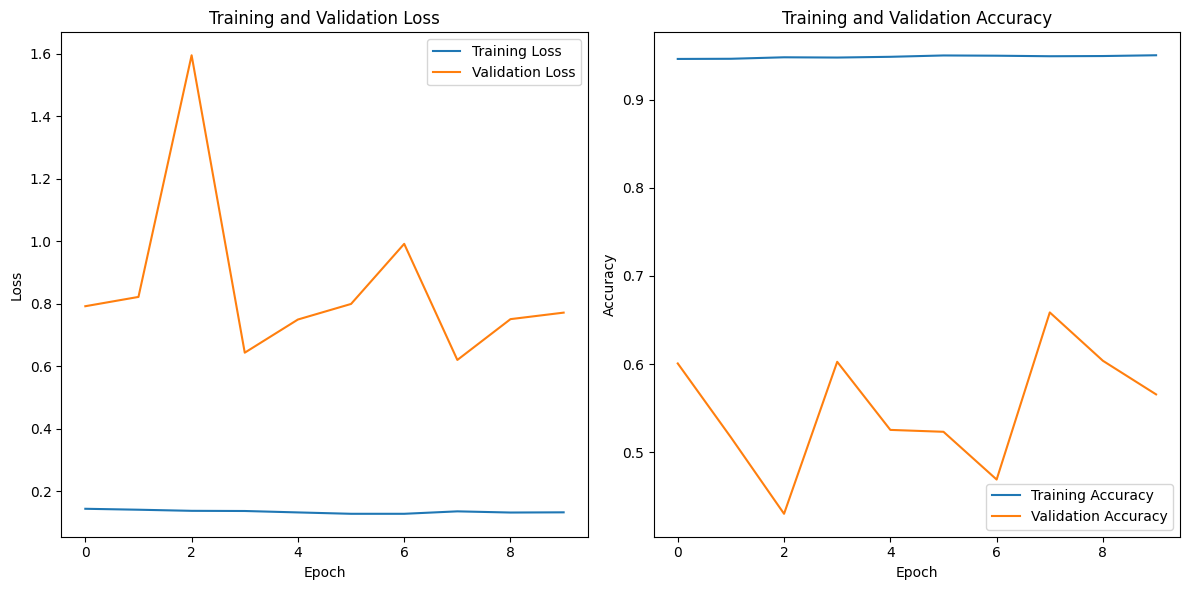

5480/5480 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step


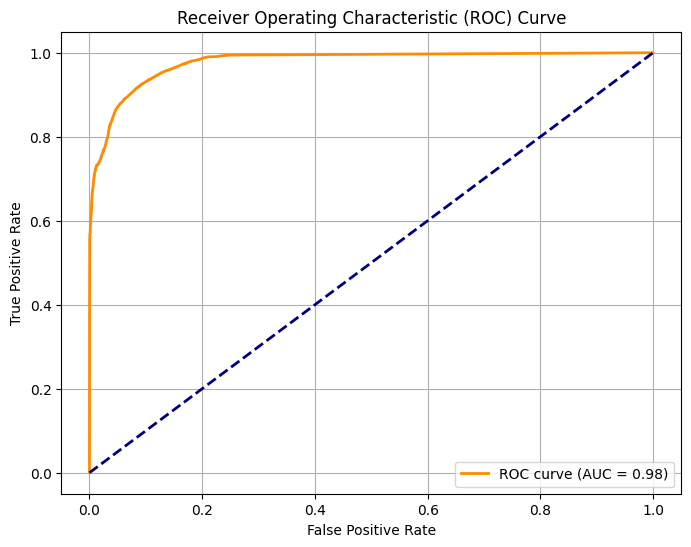

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ----- [1] Training -----
history = model_binary.fit(
    X_train_bin, y_train_bin,
    epochs=10,
    batch_size=16,
    validation_split=0.3,
    verbose=1
)

# ----- [2] Plot Learning Curves -----
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_validation_curves.png')
plt.show()

# ----- [3] ROC Curve -----
# Prediksi probabilitas
y_pred_prob = model_binary.predict(X_test_bin)
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()


In [ ]:
from sklearn.metrics import recall_score, confusion_matrix

# --- Evaluasi di test set ---
loss_bin, acc_bin = model_binary.evaluate(X_test_bin, y_test_bin, verbose=0)

# Prediksi & Konversi ke label 0/1
y_pred_prob_bin = model_binary.predict(X_test_bin)
y_pred_bin = (y_pred_prob_bin > 0.5).astype(int)

# Confusion Matrix
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm_bin.ravel()

# Metrics
detection_rate_bin = recall_score(y_test_bin, y_pred_bin)
false_positive_rate_bin = fp / (fp + tn)

# --- Cetak hasil ---
print("🔹 Binary Classification Evaluation (LuNet-style)")
print(f"Validation Accuracy     : {acc_bin:.4f}")
print(f"Detection Rate (Recall) : {detection_rate_bin:.4f}")
print(f"False Positive Rate     : {false_positive_rate_bin:.4f}")
print("Confusion Matrix:\n", cm_bin)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
🔹 Binary Classification Evaluation (LuNet-style)
Validation Accuracy     : 0.9277
Detection Rate (Recall) : 0.9674
False Positive Rate     : 0.1568
Confusion Matrix:
 [[ 47219   8781]
 [  3888 115453]]


### Batch Train 8

In [ ]:
import tensorflow as tf

num_features = train_data.shape[1] - 2  # kurangi attack_cat dan label

X_train_bin = train_data[:, :num_features]
y_train_bin = train_data[:, -1]  # label biner
X_test_bin = test_data[:, :num_features]
y_test_bin = test_data[:, -1]

model_binary = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Reshape((16, 8)),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 97s 13ms/step - accuracy: 0.6422 - loss: 0.6483 - val_accuracy: 0.3328 - val_loss: 0.8523
Epoch 2/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 131s 11ms/step - accuracy: 0.6424 - loss: 0.6524 - val_accuracy: 0.3328 - val_loss: 0.8187
Epoch 3/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.6399 - loss: 0.6537 - val_accuracy: 0.3328 - val_loss: 0.8159
Epoch 4/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 93s 12ms/step - accuracy: 0.6459 - loss: 0.6502 - val_accuracy: 0.3328 - val_loss: 0.8411
Epoch 5/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 132s 11ms/step - accuracy: 0.6433 - loss: 0.6517 - val_accuracy: 0.3328 - val_loss: 0.8370
Epoch 6/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.6456 - loss: 0.6503 - val_accuracy: 0.3328 - val_loss: 0.8417
Epoch 7/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 94s 12ms/step - accuracy: 0.6458 - loss: 0.6502 - val_accuracy: 0.3328 - val_loss: 0.8155
Epoch 8/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 147s 13ms/step - accuracy: 0.647

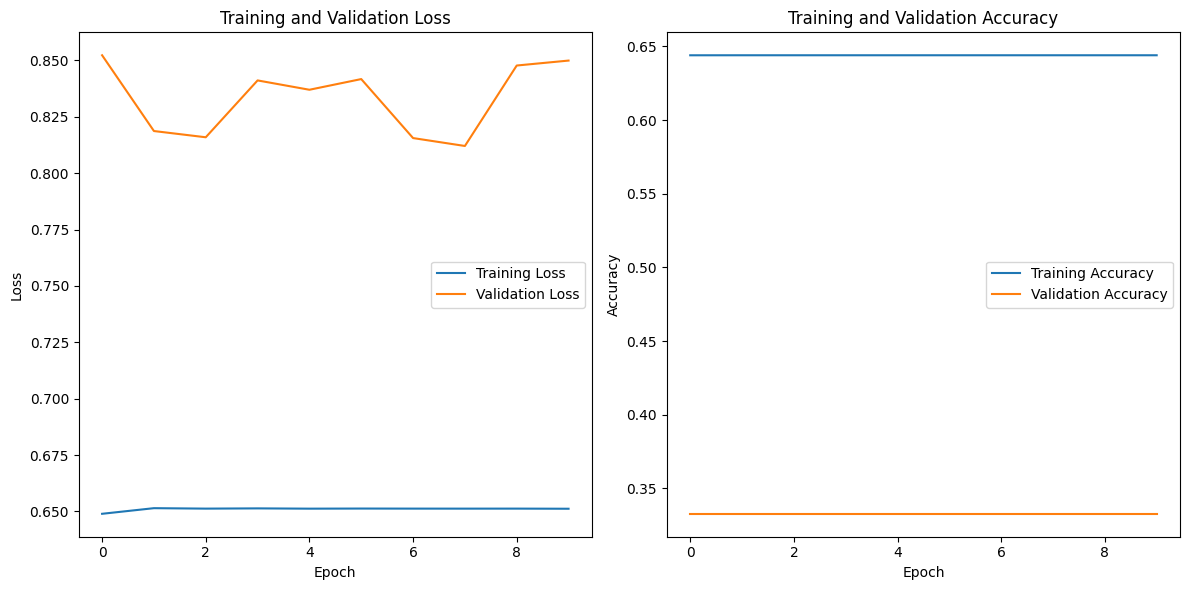

5480/5480 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step


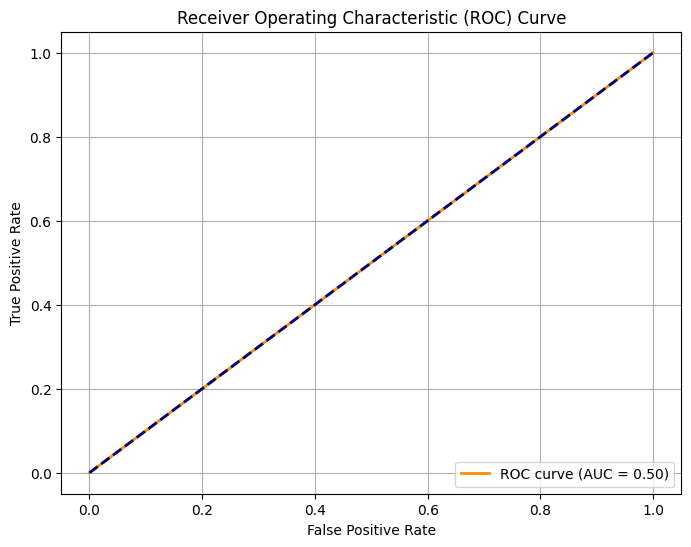

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ----- [1] Training -----
history = model_binary.fit(
    X_train_bin, y_train_bin,
    epochs=10,
    batch_size=8,
    validation_split=0.3,
    verbose=1
)

# ----- [2] Plot Learning Curves -----
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_validation_curves.png')
plt.show()

# ----- [3] ROC Curve -----
# Prediksi probabilitas
y_pred_prob = model_binary.predict(X_test_bin)
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()


In [ ]:
from sklearn.metrics import recall_score, confusion_matrix

# --- Evaluasi di test set ---
loss_bin, acc_bin = model_binary.evaluate(X_test_bin, y_test_bin, verbose=0)

# Prediksi & Konversi ke label 0/1
y_pred_prob_bin = model_binary.predict(X_test_bin)
y_pred_bin = (y_pred_prob_bin > 0.5).astype(int)

# Confusion Matrix
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm_bin.ravel()

# Metrics
detection_rate_bin = recall_score(y_test_bin, y_pred_bin)
false_positive_rate_bin = fp / (fp + tn)

# --- Cetak hasil ---
print("🔹 Binary Classification Evaluation (LuNet-style)")
print(f"Validation Accuracy     : {acc_bin:.4f}")
print(f"Detection Rate (Recall) : {detection_rate_bin:.4f}")
print(f"False Positive Rate     : {false_positive_rate_bin:.4f}")
print("Confusion Matrix:\n", cm_bin)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step
🔹 Binary Classification Evaluation (LuNet-style)
Validation Accuracy     : 0.6806
Detection Rate (Recall) : 1.0000
False Positive Rate     : 1.0000
Confusion Matrix:
 [[     0  56000]
 [     0 119341]]


## Multiclass

### Batch Train 16

In [ ]:
import tensorflow as tf

num_classes = 10  # Ganti sesuai jumlah kelas aktual dari attack_cat
num_features = train_data.shape[1] - 2  # Hilangkan attack_cat dan label

# Gunakan kolom attack_cat sebagai label multi-class
X_train_multi = train_data[:, :num_features]
y_train_multi = train_data[:, -2].astype(int)  # kolom attack_cat
X_test_multi = test_data[:, :num_features]
y_test_multi = test_data[:, -2].astype(int)

# Model multiclass
model_multi = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Reshape((16, 8)),  # 16x8 harus cocok dengan num_features
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Multi-class output
])

# Kompilasi model
model_multi.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # gunakan label integer (0...n-1)
    metrics=['accuracy']
)

# Training
history_multi = model_multi.fit(
    X_train_multi, y_train_multi,
    epochs=10,
    batch_size=16,
    validation_split=0.3,
    verbose=1
)

Epoch 1/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.5306 - loss: 1.2948 - val_accuracy: 0.2658 - val_loss: 1.5783
Epoch 2/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7057 - loss: 0.7843 - val_accuracy: 0.4047 - val_loss: 1.2970
Epoch 3/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.7276 - loss: 0.7176 - val_accuracy: 0.4483 - val_loss: 1.2230
Epoch 4/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - accuracy: 0.7502 - loss: 0.6697 - val_accuracy: 0.3525 - val_loss: 1.4128
Epoch 5/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.7648 - loss: 0.6334 - val_accuracy: 0.4149 - val_loss: 1.1705
Epoch 6/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - accuracy: 0.7691 - loss: 0.6185 - val_accuracy: 0.2327 - val_loss: 2.5076
Epoch 7/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7725 - loss: 0.6086 - val_accuracy: 0.4501 - val_loss: 1.2327
Epoch 8/10
3602/3602 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.7832 -

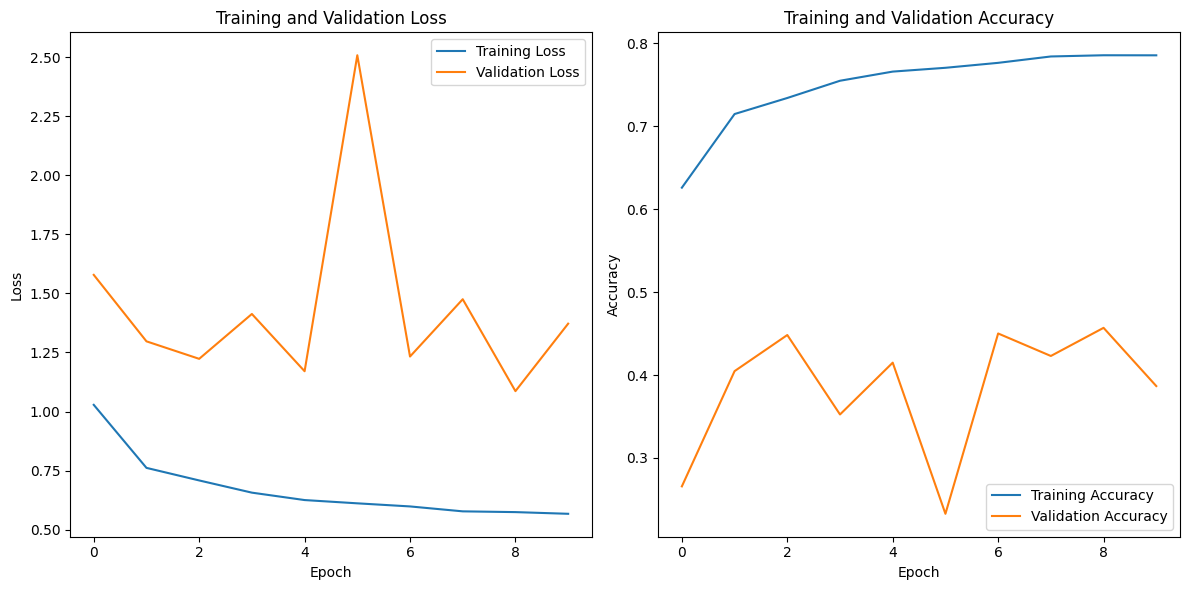

In [ ]:
# ----- [2] Plot Learning Curves -----
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_multi.history['loss'], label='Training Loss')
plt.plot(history_multi.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_multi.history['accuracy'], label='Training Accuracy')
plt.plot(history_multi.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('multiclass_training_validation_curves.png')
plt.show()

5480/5480 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step


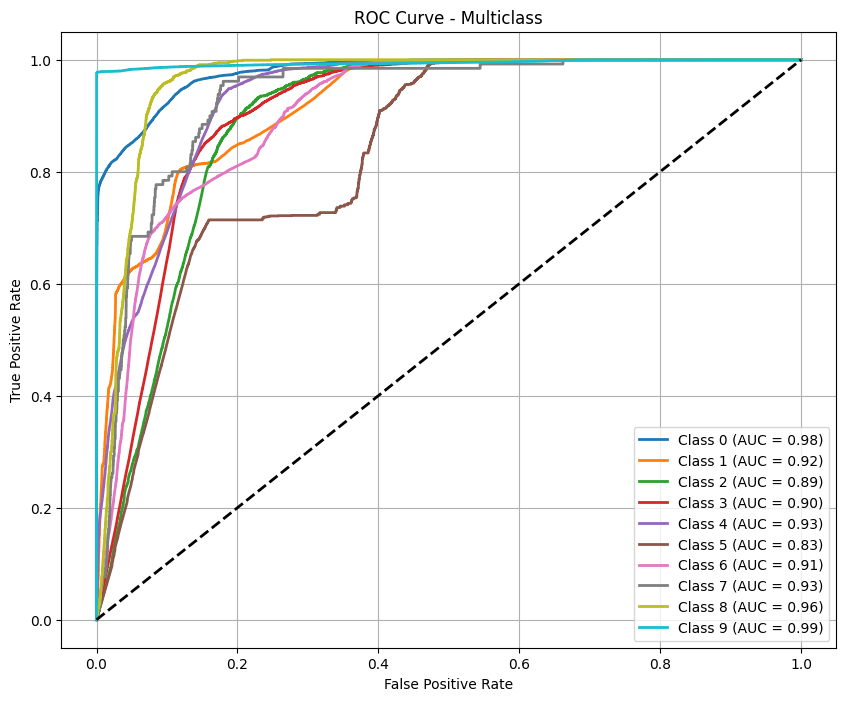

In [ ]:
# ----- [3] ROC Curve -----
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Prediksi probabilitas
y_score = model_multi.predict(X_test_multi)

# Label asli (dalam bentuk integer)
y_true = y_test_multi

# One-hot encode y_true
classes = np.unique(y_true)
y_true_bin = label_binarize(y_true, classes=classes)
n_classes = y_true_bin.shape[1]

# ROC Curve per kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC untuk tiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (AUC = {:.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('multiclass_roc_curve.png')
plt.show()

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np

# ----- [1] Prediksi & Label -----
y_pred_prob_multi = model_multi.predict(X_test_multi)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)

# Jika y_test_multi masih label integer, gunakan langsung:
y_true_multi = y_test_multi.astype(int)

# ----- [2] Confusion Matrix -----
cm = confusion_matrix(y_true_multi, y_pred_multi)

# ----- [3] Accuracy -----
acc = accuracy_score(y_true_multi, y_pred_multi)

# ----- [4] Macro Recall (Detection Rate) -----
detection_rate = recall_score(y_true_multi, y_pred_multi, average='macro')

# ----- [5] False Positive Rate (macro average) -----
false_positive_rates = []
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
    false_positive_rates.append(fpr)
fpr_macro = np.mean(false_positive_rates)

# ----- [6] Cetak Hasil -----
print("🔹 Multiclass Classification Evaluation")
print(f"Validation Accuracy     : {acc:.4f}")
print(f"Detection Rate (Recall) : {detection_rate:.4f}")
print(f"False Positive Rate     : {fpr_macro:.4f}")
print("Confusion Matrix:\n", cm)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
🔹 Multiclass Classification Evaluation
Validation Accuracy     : 0.7342
Detection Rate (Recall) : 0.4246
False Positive Rate     : 0.0299
Confusion Matrix:
 [[44423  1975     0   380  2209     0  7008     0     0     5]
 [   14  6646     0  1537  1908     0   385     0     0     1]
 [   25    69     0  1230   413     0     9     0     0     0]
 [   96   499     0  8500  3067     0    88     0     0    14]
 [  246  1459     0 11079 20188     0   344     0     0    77]
 [  224     0     0  1323   452     0     1     0     0     0]
 [  476  4381     0  1354  2073     0  9887     0     0    13]
 [    4    15     0     0   111     0     0     0     0     0]
 [    0  1066     0     0     3     0    64     0     0     0]
 [   19   125     0   274   462     0    23     0     0 39097]]


### Batch Train 8

In [ ]:
import tensorflow as tf

num_classes = 10  # Ganti sesuai jumlah kelas aktual dari attack_cat
num_features = train_data.shape[1] - 2  # Hilangkan attack_cat dan label

# Gunakan kolom attack_cat sebagai label multi-class
X_train_multi = train_data[:, :num_features]
y_train_multi = train_data[:, -2].astype(int)  # kolom attack_cat
X_test_multi = test_data[:, :num_features]
y_test_multi = test_data[:, -2].astype(int)

# Model multiclass
model_multi = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Reshape((16, 8)),  # 16x8 harus cocok dengan num_features
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Multi-class output
])

# Kompilasi model
model_multi.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # gunakan label integer (0...n-1)
    metrics=['accuracy']
)

# Training
history_multi = model_multi.fit(
    X_train_multi, y_train_multi,
    epochs=10,
    batch_size=8,
    validation_split=0.3,
    verbose=1
)

Epoch 1/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.5094 - loss: 1.4034 - val_accuracy: 0.2136 - val_loss: 1.6769
Epoch 2/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 70s 10ms/step - accuracy: 0.6877 - loss: 0.8389 - val_accuracy: 0.3571 - val_loss: 1.6924
Epoch 3/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.6568 - loss: 1.0812 - val_accuracy: 0.2873 - val_loss: 1.8306
Epoch 4/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 84s 12ms/step - accuracy: 0.6670 - loss: 1.0610 - val_accuracy: 0.4848 - val_loss: 1.6443
Epoch 5/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 139s 11ms/step - accuracy: 0.6723 - loss: 1.0452 - val_accuracy: 0.4534 - val_loss: 1.6951
Epoch 6/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.6750 - loss: 1.0364 - val_accuracy: 0.5121 - val_loss: 1.5881
Epoch 7/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.6721 - loss: 1.0412 - val_accuracy: 0.4076 - val_loss: 1.5738
Epoch 8/10
7204/7204 ━━━━━━━━━━━━━━━━━━━━ 72s 10ms/step - accuracy: 0.6935 

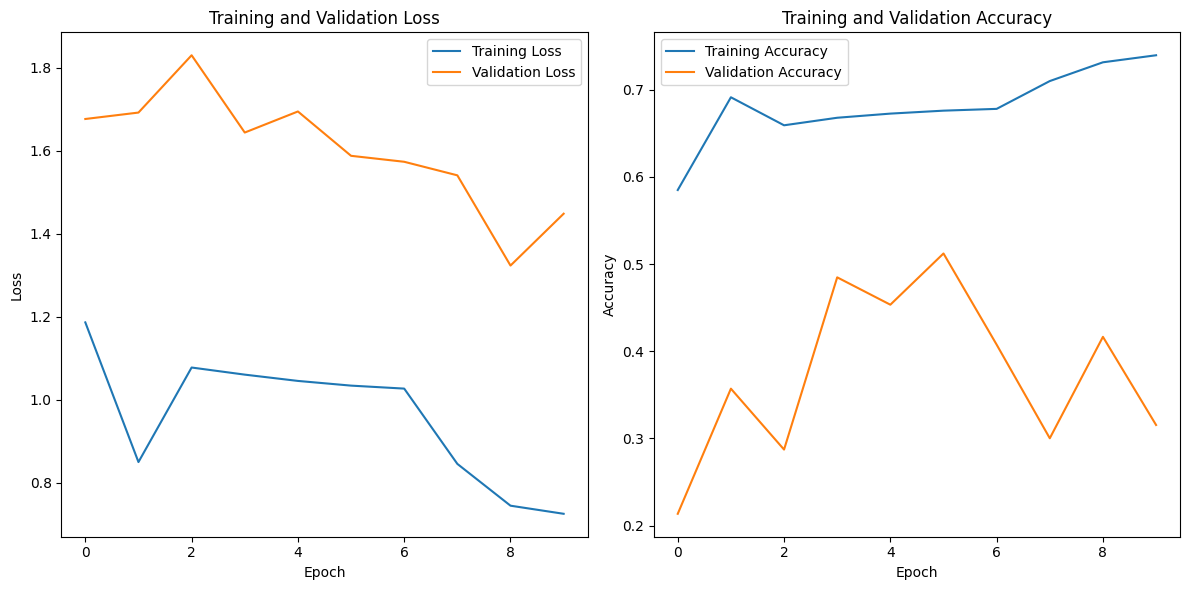

In [ ]:
# ----- [2] Plot Learning Curves -----
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_multi.history['loss'], label='Training Loss')
plt.plot(history_multi.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_multi.history['accuracy'], label='Training Accuracy')
plt.plot(history_multi.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('multiclass_training_validation_curves.png')
plt.show()

5480/5480 ━━━━━━━━━━━━━━━━━━━━ 69s 13ms/step


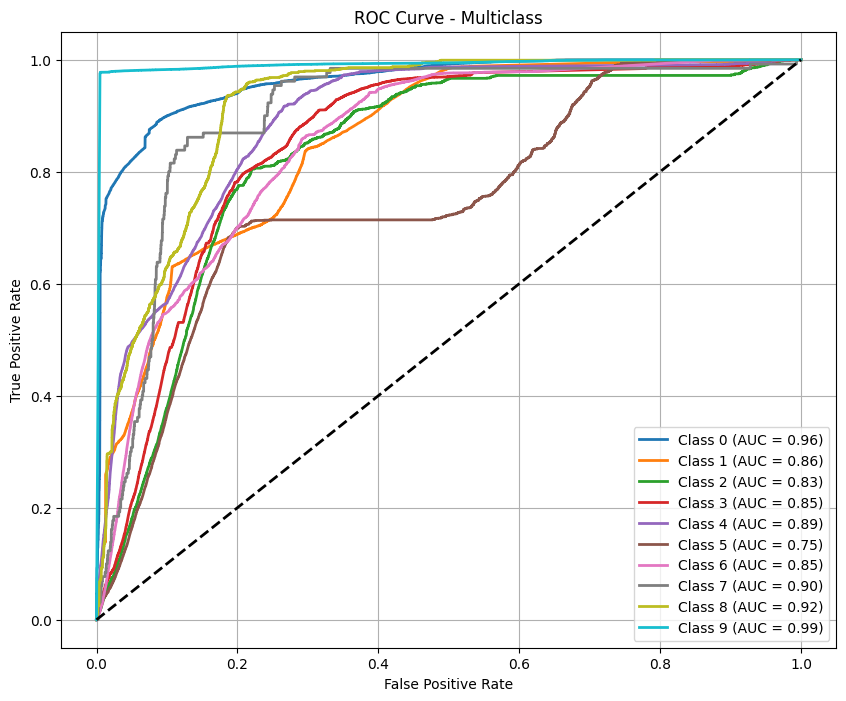

In [ ]:
# ----- [3] ROC Curve -----
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Prediksi probabilitas
y_score = model_multi.predict(X_test_multi)

# Label asli (dalam bentuk integer)
y_true = y_test_multi

# One-hot encode y_true
classes = np.unique(y_true)
y_true_bin = label_binarize(y_true, classes=classes)
n_classes = y_true_bin.shape[1]

# ROC Curve per kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC untuk tiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (AUC = {:.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('multiclass_roc_curve.png')
plt.show()

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np

# ----- [1] Prediksi & Label -----
y_pred_prob_multi = model_multi.predict(X_test_multi)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)

# Jika y_test_multi masih label integer, gunakan langsung:
y_true_multi = y_test_multi.astype(int)

# ----- [2] Confusion Matrix -----
cm = confusion_matrix(y_true_multi, y_pred_multi)

# ----- [3] Accuracy -----
acc = accuracy_score(y_true_multi, y_pred_multi)

# ----- [4] Macro Recall (Detection Rate) -----
detection_rate = recall_score(y_true_multi, y_pred_multi, average='macro')

# ----- [5] False Positive Rate (macro average) -----
false_positive_rates = []
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
    false_positive_rates.append(fpr)
fpr_macro = np.mean(false_positive_rates)

# ----- [6] Cetak Hasil -----
print("🔹 Multiclass Classification Evaluation")
print(f"Validation Accuracy     : {acc:.4f}")
print(f"Detection Rate (Recall) : {detection_rate:.4f}")
print(f"False Positive Rate     : {fpr_macro:.4f}")
print("Confusion Matrix:\n", cm)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
🔹 Multiclass Classification Evaluation
Validation Accuracy     : 0.6854
Detection Rate (Recall) : 0.3662
False Positive Rate     : 0.0361
Confusion Matrix:
 [[42180   242     0  4370  3198     0  6003     0     0     7]
 [   89  3227     0  1490  5059     0   517     0     0   109]
 [   65   117     0  1057   486     0    20     0     0     1]
 [  327   931     0  7112  3677     0   112     0     0   105]
 [  558  1439     0  9525 21037     0   704     0     0   130]
 [   11    87     0  1109   752     0    40     0     0     1]
 [  324   982     0  3943  5001     0  7524     0     0   410]
 [    2    13     0     0   115     0     0     0     0     0]
 [    7   499     0    31   514     0    82     0     0     0]
 [   20   139     0   212   494     0    39     0     0 39096]]
